In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

In [2]:
# Load the dataset
file_path = "recruitment_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Display first 5 rows
print("----- HEAD (First 5 Rows) -----")
df.head()

----- HEAD (First 5 Rows) -----


,Applicant ID,Application Date,First Name,Last Name,Gender,Date of Birth,Phone Number,Email,Address,City,State,Zip Code,Country,Education Level,Years of Experience,Desired Salary,Job Title,Status
0,1001,03-Jun-23,Scott,Sheppard,Male,31-08-1992,421-429-7655x39421,perezjanet@example.org,597 Smith Point,Hollandfort,NV,57588,Micronesia,High School,8,60103.21,Chief Technology Officer,Interviewing
1,1002,15-May-23,Stanley,Lewis,Male,29-04-1965,+1-451-574-5308x1681,grossmark@example.com,8116 Stuart Loop,Port Margaretfurt,TN,14726,Greenland,Bachelor's Degree,17,64575.84,"Designer, furniture",Rejected
2,1003,04-Aug-23,Javier,Li,Female,10-03-1973,(858)901-5499,katiemaldonado@example.com,5940 Barr Villages Suite 075,Dianaland,TX,4699,China,PhD,20,39422.71,"Sound technician, broadcasting/film/video",Rejected
3,1004,28-Jul-23,Christopher,Johnston,Other,04-04-2001,(853)681-1839x2010,sheila73@example.com,442 Lewis Mount,Youngfurt,GA,34455,Ghana,High School,8,51045.11,Air cabin crew,Rejected
4,1005,05-Jun-23,Melissa,Hicks,Other,17-06-1978,364-575-8478x67812,emilypatterson@example.org,95961 Taylor Circles Apt. 169,East Ashleyborough,IN,21014,Solomon Islands,Master's Degree,0,52792.86,Art therapist,Interviewing


In [4]:
# Display last 5 rows
print("\n----- TAIL (Last 5 Rows) -----")
df.tail()


----- TAIL (Last 5 Rows) -----


,Applicant ID,Application Date,First Name,Last Name,Gender,Date of Birth,Phone Number,Email,Address,City,State,Zip Code,Country,Education Level,Years of Experience,Desired Salary,Job Title,Status
2995,3996,18-May-23,Melinda,Butler,Male,25-11-1993,001-324-747-3549x4392,davisvickie@example.org,1307 Stephen Walk Apt. 998,West Jennifer,WY,17130,India,PhD,20,65428.69,"Psychologist, forensic",Offered
2996,3997,12-Jul-23,Latasha,Johnson,Male,29-01-1978,(870)454-9481x49987,gpeterson@example.net,2945 Morse Wells,New Lindsey,MH,81966,Turkey,Bachelor's Degree,0,37297.03,Operational investment banker,Applied
2997,3998,19-Jun-23,Cheryl,Gill,Other,08-02-2000,001-847-873-3665,bschultz@example.net,36716 Kevin Locks Suite 422,Schmidtfurt,ME,59399,Maldives,High School,10,31093.70,Petroleum engineer,Rejected
2998,3999,16-May-23,Danielle,Villegas,Female,08-08-1994,(385)467-6434x67311,alvarezstephen@example.net,0983 Jeremy Burgs,Michaelhaven,KY,37855,Ghana,Bachelor's Degree,14,59442.38,Housing manager/officer,Applied
2999,4000,07-Jul-23,Charles,Hernandez,Female,01-06-1980,(772)767-2580,murrayallison@example.com,146 Cheryl Highway,Hallland,OR,8592,Netherlands,Bachelor's Degree,1,89853.85,"Loss adjuster, chartered",Rejected


In [5]:
# Display dataset information
print("\n----- INFO -----")
df.info()


----- INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Applicant ID         3000 non-null   int64  
 1   Application Date     3000 non-null   object 
 2   First Name           3000 non-null   object 
 3   Last Name            3000 non-null   object 
 4   Gender               3000 non-null   object 
 5   Date of Birth        3000 non-null   object 
 6   Phone Number         3000 non-null   object 
 7   Email                3000 non-null   object 
 8   Address              3000 non-null   object 
 9   City                 3000 non-null   object 
 10  State                3000 non-null   object 
 11  Zip Code             3000 non-null   int64  
 12  Country              3000 non-null   object 
 13  Education Level      3000 non-null   object 
 14  Years of Experience  3000 non-null   int64  
 15  Desired Salary      

In [6]:
# Display dataset shape
print("\n----- SHAPE -----")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


----- SHAPE -----
Rows: 3000, Columns: 18


In [7]:
# Columns to drop (irrelevant + sensitive)
columns_to_drop = [
    "Applicant ID",
    "First Name",
    "Last Name",
    "Phone Number",
    "Email",
    "Address",
    "City",
    "State",
    "Zip Code",
    "Gender",
    "Date of Birth",
    "Country"
]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Verify the result
print("Remaining columns after dropping:")
print(df_cleaned.columns.tolist())

print("\nDataset shape after dropping columns:")
print(df_cleaned.shape)

Remaining columns after dropping:
['Application Date', 'Education Level', 'Years of Experience', 'Desired Salary', 'Job Title', 'Status']

Dataset shape after dropping columns:
(3000, 6)


In [8]:
# Convert Application Date
df_cleaned["Application Date"] = pd.to_datetime(df_cleaned["Application Date"])

/tmp/ipython-input-2293892138.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned["Application Date"] = pd.to_datetime(df_cleaned["Application Date"])


In [9]:
# Experience Level
df_cleaned["Experience Level"] = pd.cut(
    df_cleaned["Years of Experience"],
    bins=[-1, 2, 7, 50],
    labels=["Entry", "Mid", "Senior"]
)

In [10]:
# Salary per Experience Year
df_cleaned["Salary_per_Experience"] = (
    df_cleaned["Desired Salary"] / (df_cleaned["Years of Experience"] + 1)
)

In [11]:
# Salary Band (Quantiles)
df_cleaned["Salary Band"] = pd.qcut(
    df_cleaned["Desired Salary"],
    q=3,
    labels=["Low", "Medium", "High"]
)

In [12]:
# Application Timing
df_cleaned["Application Month"] = df_cleaned["Application Date"].dt.month
df_cleaned["Application Quarter"] = df_cleaned["Application Date"].dt.quarter

In [13]:
# Original columns used for feature engineering
original_columns_to_remove = [
    "Application Date",
    "Years of Experience",
    "Desired Salary",
]

# Drop the original columns
df_model = df_cleaned.drop(columns=original_columns_to_remove)

# Verify final dataset
print("Final columns for modeling:")
print(df_model.columns.tolist())

print("\nFinal dataset shape:")
print(df_model.shape)

Final columns for modeling:
['Education Level', 'Job Title', 'Status', 'Experience Level', 'Salary_per_Experience', 'Salary Band', 'Application Month', 'Application Quarter']

Final dataset shape:
(3000, 8)


In [14]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Education Level        3000 non-null   object  
 1   Job Title              3000 non-null   object  
 2   Status                 3000 non-null   object  
 3   Experience Level       3000 non-null   category
 4   Salary_per_Experience  3000 non-null   float64 
 5   Salary Band            3000 non-null   category
 6   Application Month      3000 non-null   int32   
 7   Application Quarter    3000 non-null   int32   
dtypes: category(2), float64(1), int32(2), object(3)
memory usage: 123.4+ KB


In [15]:
# Identify categorical columns
categorical_columns = df_model.select_dtypes(include=["object", "category"]).columns

# Display unique values for each categorical column
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df_model[col].unique())


Unique values in 'Education Level':
['High School' "Bachelor's Degree" 'PhD' "Master's Degree"]

Unique values in 'Job Title':
['Chief Technology Officer' 'Designer, furniture'
 'Sound technician, broadcasting/film/video' 'Air cabin crew'
 'Art therapist' 'Engineer, electronics' 'Scientist, research (maths)'
 'Teacher, primary school' 'Phytotherapist' 'Pilot, airline'
 'Theatre director' 'Corporate treasurer' 'Accounting technician'
 'Learning disability nurse' 'Web designer'
 'Scientist, research (physical sciences)' 'Higher education lecturer'
 'Merchandiser, retail' 'Buyer, retail' 'Water quality scientist'
 'Optician, dispensing' 'Scientist, marine'
 'Armed forces technical officer' 'Herpetologist'
 'Production assistant, radio' 'Publishing rights manager'
 'Designer, television/film set' 'Designer, jewellery' 'Media buyer'
 'Designer, textile' 'Commercial horticulturist' 'Food technologist'
 'Chartered accountant' 'Surveyor, rural practice'
 'Dance movement psychotherapist' 'Even

In [16]:
# Select numeric columns only
numeric_columns = df_model.select_dtypes(include=["int64", "float64"]).columns

# Initialize an outlier mask
outlier_mask = np.zeros(len(df_model), dtype=bool)

# Detect outliers using IQR for each numeric column
for col in numeric_columns:
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_col = (df_model[col] < lower_bound) | (df_model[col] > upper_bound)
    outlier_mask = outlier_mask | outliers_col

# Calculate total outliers
total_outlier_rows = outlier_mask.sum()
total_rows = len(df_model)
outlier_percentage = (total_outlier_rows / total_rows) * 100

print(f"Percentage of rows containing outliers: {outlier_percentage:.2f}%")

Percentage of rows containing outliers: 11.70%


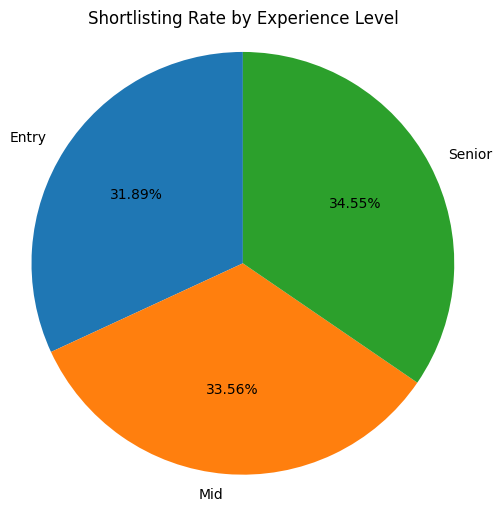

In [18]:
# Define shortlisted statuses
shortlisted_statuses = ["Interviewing", "Offered"]

# Calculate shortlisting rate (%) by experience level
exp_rate = (
    df_model
    .assign(
        Shortlisted=df_model["Status"].isin(shortlisted_statuses)
    )
    .groupby("Experience Level", observed=True)["Shortlisted"]
    .mean() * 100
)

labels = exp_rate.index.astype(str)
sizes = exp_rate.values

plt.figure(figsize=(6, 6))

plt.pie(
    sizes,
    labels=labels,
    autopct="%.2f%%",
    startangle=90
)

plt.title("Shortlisting Rate by Experience Level")
plt.axis("equal")

plt.show()

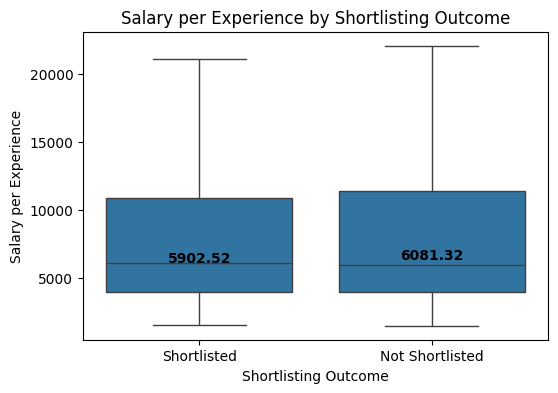

In [23]:
# Define shortlisted statuses
shortlisted_statuses = ["Interviewing", "Offered"]

# Create a readable status label for plotting
df_plot = df_model.copy()
df_plot["Shortlisting Outcome"] = df_plot["Status"].apply(
    lambda x: "Shortlisted" if x in shortlisted_statuses else "Not Shortlisted"
)

plt.figure(figsize=(6, 4))

ax = sns.boxplot(
    x="Shortlisting Outcome",
    y="Salary_per_Experience",
    data=df_plot,
    showfliers=False   # removes extreme clutter from outliers
)

plt.title("Salary per Experience by Shortlisting Outcome")
plt.xlabel("Shortlisting Outcome")
plt.ylabel("Salary per Experience")

# Add median value annotations
medians = (
    df_plot
    .groupby("Shortlisting Outcome")["Salary_per_Experience"]
    .median()
)

for i, (label, median) in enumerate(medians.items()):
    ax.text(
        i,
        median,
        f"{median:.2f}",
        ha="center",
        va="bottom",
        fontweight="bold"
    )

plt.show()

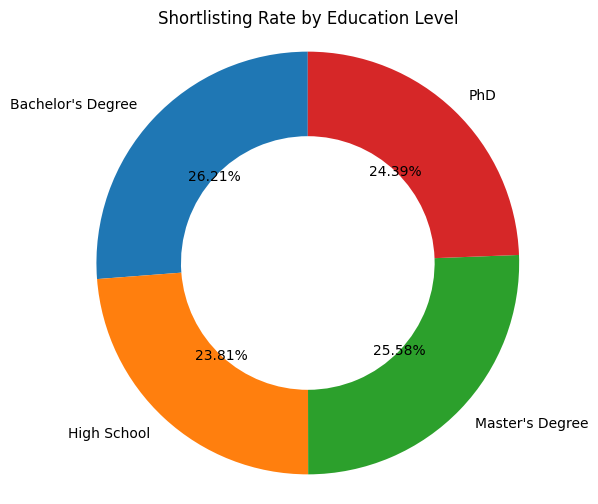

In [22]:
# Define shortlisted statuses
shortlisted_statuses = ["Interviewing", "Offered"]

# Calculate shortlisting rate (%) by education level
edu_rate = (
    df_model
    .assign(
        Shortlisted=df_model["Status"].isin(shortlisted_statuses)
    )
    .groupby("Education Level", observed=True)["Shortlisted"]
    .mean() * 100
)

labels = edu_rate.index.tolist()
sizes = edu_rate.values

plt.figure(figsize=(6, 6))

# Create donut chart
plt.pie(
    sizes,
    labels=labels,
    autopct="%.2f%%",
    startangle=90,
    wedgeprops=dict(width=0.4)
)

plt.title("Shortlisting Rate by Education Level")
plt.axis("equal")  # Ensures donut is circular

plt.show()

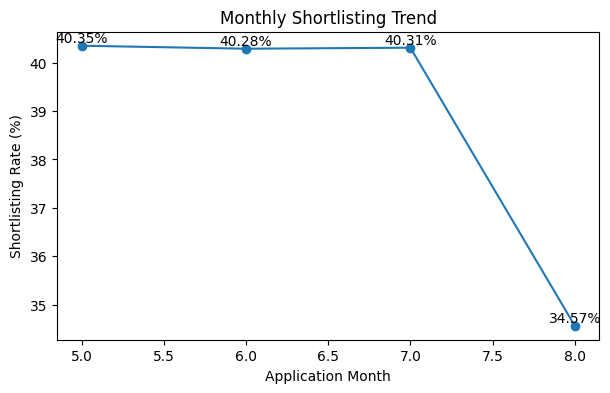

In [24]:
# Define shortlisted statuses
shortlisted_statuses = ["Interviewing", "Offered"]

# Compute monthly shortlisting rate (%)
monthly_rate = (
    df_model
    .assign(Shortlisted=df_model["Status"].isin(shortlisted_statuses))
    .groupby("Application Month", observed=True)["Shortlisted"]
    .mean() * 100
)

plt.figure(figsize=(7, 4))
plt.plot(monthly_rate.index, monthly_rate.values, marker="o")

plt.xlabel("Application Month")
plt.ylabel("Shortlisting Rate (%)")
plt.title("Monthly Shortlisting Trend")

# Annotate values
for x, y in zip(monthly_rate.index, monthly_rate.values):
    plt.text(x, y, f"{y:.2f}%", ha="center", va="bottom")

plt.show()

In [27]:
# Ordinal encoding maps
experience_map = {
    "Entry": 0,
    "Mid": 1,
    "Senior": 2
}

salary_band_map = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}

# Apply mappings
df_model["Experience Level"] = df_model["Experience Level"].map(experience_map)
df_model["Salary Band"] = df_model["Salary Band"].map(salary_band_map)

In [28]:
# Frequency encoding for Job Title
job_title_freq = df_model["Job Title"].value_counts(normalize=True)

df_model["Job Title Encoded"] = df_model["Job Title"].map(job_title_freq)

# Drop original Job Title
df_model.drop(columns=["Job Title"], inplace=True)

In [29]:
# Binary target encoding
status_map = {
    "Offered": 1,
    "Interviewing": 1,
    "Rejected": 0,
    "In Review": 0,
    "Applied": 0
}

df_model["Status"] = df_model["Status"].map(status_map)

In [30]:
# Ordinal encoding for Education Level
education_map = {
    "High School": 1,
    "Bachelor's Degree": 2,
    "Master's Degree": 3,
    "PhD": 4
}

# Apply encoding
df_model["Education Rank"] = df_model["Education Level"].map(education_map)

# Drop original Education Level column
df_model.drop(columns=["Education Level"], inplace=True)

# Verify
print(df_model[["Education Rank"]].head())
print(df_model.dtypes)

   Education Rank
0               1
1               2
2               4
3               1
4               3
Status                      int64
Experience Level         category
Salary_per_Experience     float64
Salary Band              category
Application Month           int32
Application Quarter         int32
Job Title Encoded         float64
Education Rank              int64
dtype: object


In [31]:
df_model.head()

,Status,Experience Level,Salary_per_Experience,Salary Band,Application Month,Application Quarter,Job Title Encoded,Education Rank
0,1,2,6678.134444,1,6,2,0.002000,1
1,0,2,3587.546667,1,5,2,0.002667,2
2,0,2,1877.271905,0,8,3,0.003667,4
3,0,2,5671.678889,0,7,3,0.001333,1
4,1,0,52792.860000,0,6,2,0.001000,3


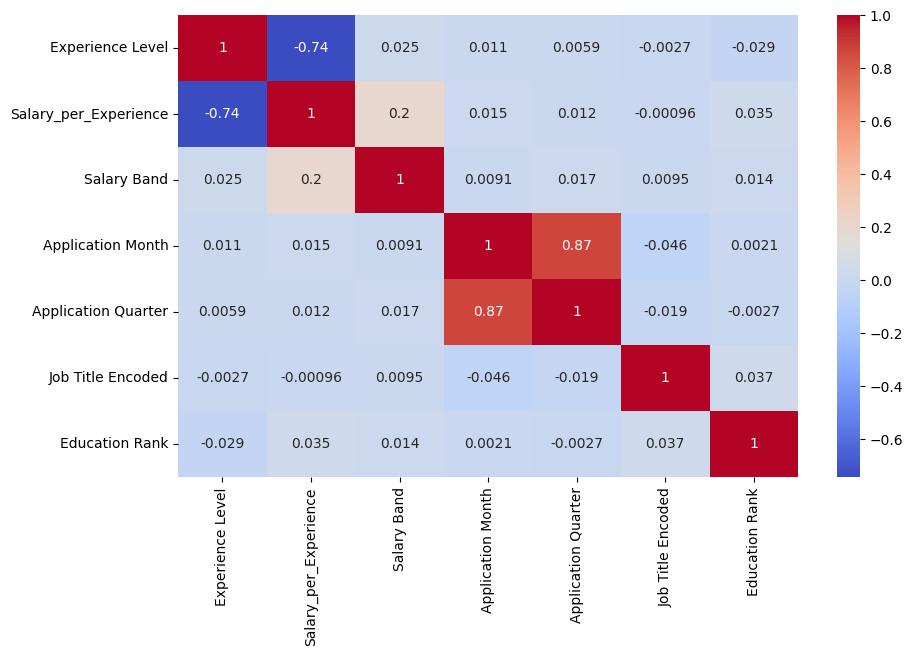

In [32]:
corr = df_model.drop(columns=["Status"]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [33]:
# Drop highly correlated feature
df_model.drop(columns=["Application Quarter"], inplace=True)

# Verify
print(df_model.columns)

Index(['Status', 'Experience Level', 'Salary_per_Experience', 'Salary Band',
       'Application Month', 'Job Title Encoded', 'Education Rank'],
      dtype='object')


In [34]:
# Separate features (X) and target (y)
X = df_model.drop(columns=["Status"])
y = df_model["Status"]

# Train-test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Verify split sizes
print("Training set shape:")
print(X_train.shape, y_train.shape)

print("\nTest set shape:")
print(X_test.shape, y_test.shape)

Training set shape:
(2250, 6) (2250,)

Test set shape:
(750, 6) (750,)


In [35]:
# Check class distribution (percentage)
class_percentages = y_train.value_counts(normalize=True) * 100
print("\nClass percentages:")
print(class_percentages.round(2))


Class percentages:
Status
0    60.0
1    40.0
Name: proportion, dtype: float64


In [36]:
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

In [37]:
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

gb_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7]
}

In [38]:
rf_search = RandomizedSearchCV(
    rf,
    rf_param_grid,
    n_iter=10,
    scoring="f1",
    cv=5,
    random_state=42,
    n_jobs=-1
)

gb_search = RandomizedSearchCV(
    gb,
    gb_param_grid,
    n_iter=10,
    scoring="f1",
    cv=5,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)
gb_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
best_gb = gb_search.best_estimator_

In [39]:
hybrid_model = VotingClassifier(
    estimators=[
        ("Random Forest", best_rf),
        ("Gradient Boosting", best_gb)
    ],
    voting="soft"
)

hybrid_model.fit(X_train, y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=30,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=200,
                                                         random_state=42))],
                 voting='soft')

In [40]:
y_pred = hybrid_model.predict(X_test)
y_proba = hybrid_model.predict_proba(X_test)[:, 1]

In [41]:
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_proba)
}

print("Model Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value*100:.2f}%")

Model Performance Metrics:
Accuracy: 54.00%
Precision: 38.22%
Recall: 24.33%
F1-score: 29.74%
ROC-AUC: 45.80%


In [42]:
class_names = ["Not Shortlisted", "Shortlisted"]

report = classification_report(
    y_test,
    y_pred,
    target_names=class_names,
    output_dict=True
)

report_df = pd.DataFrame(report).transpose()
report_df = report_df.applymap(lambda x: f"{x*100:.2f}%" if isinstance(x, float) else x)

print("\nClassification Report:")
display(report_df)


Classification Report:


/tmp/ipython-input-1180130344.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report_df = report_df.applymap(lambda x: f"{x*100:.2f}%" if isinstance(x, float) else x)


,precision,recall,f1-score,support
Not Shortlisted,59.39%,73.78%,65.81%,45000.00%
Shortlisted,38.22%,24.33%,29.74%,30000.00%
accuracy,54.00%,54.00%,54.00%,54.00%
macro avg,48.81%,49.06%,47.77%,75000.00%
weighted avg,50.92%,54.00%,51.38%,75000.00%


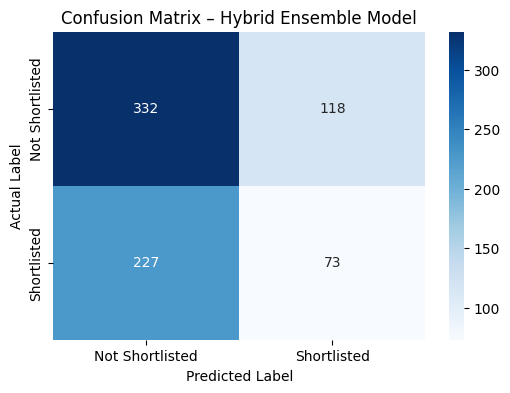

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix – Hybrid Ensemble Model")
plt.show()